# Atividade 01 - Parte 01 - Inventário de emissões utilizando Python

Aluna: Bruna Boscato Toscani

## Planilha de fatores de emissões compiladas:

Utilizei o capítulo 1.1 da AP-42, pois meu empreendimento é uma termoelétrica. https://www.epa.gov/sites/default/files/2020-09/documents/1.1_bituminous_and_subbituminous_coal_combustion.pdf

In [3]:
import pandas as pd
import os
df = pd.read_csv(r"C:\Users\bruna\OneDrive\Documentos\UFSC\Controle de Poluicao Atmosferica\ENS5173_20241\tabelas\FE\chpt_1_1.csv" , encoding='ISO-8859-1')

cwd = os.getcwd()
#Pasta dos fatores de emissão
path = cwd+'\\tabelas\\FE' #pasta onde tenho os fatores de emissão
chapterNumber = 1
subChapter = 1
file = 'chpt_'+str(chapterNumber)+'_'+str(subChapter)+'.csv'

df

,Tipo de fonte,PM,PM-10,SOx,NOx,CO
0,"PC, dry bottom, cell burnerh fired, bituminous",0.0400,0.0125,0.01899,0.01550,0.00025
1,Cyclone Furnance,0.0100,0.0016,0.01899,0.01650,0.00025
2,Spreader Stoker,0.0330,0.0066,0.01899,0.00550,0.00250
3,Overfeed stokeri,0.0080,0.0030,0.01899,0.00375,0.00300
4,Underfeed stoker,0.0075,0.0031,0.01550,0.00476,0.00550
5,Hand-fed units,0.0075,0.0031,0.01550,0.00454,0.13780


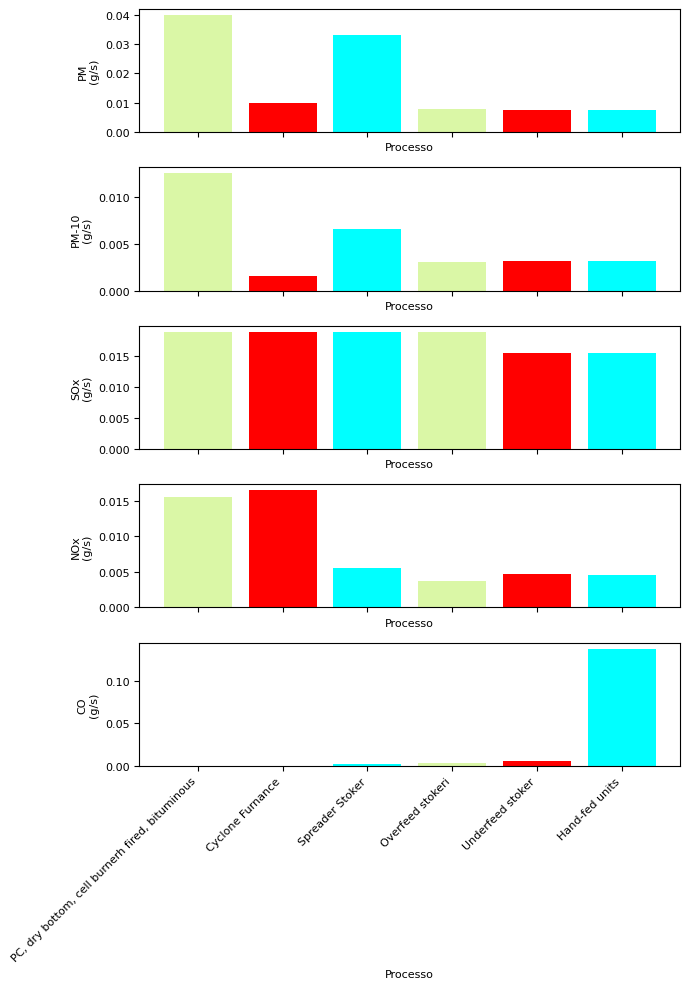

In [4]:
import matplotlib.pyplot as plt
import pandas as pd

fe = df
# Criando a figura com Matplotlib
# Subplots com número de linhas igual ao número de poluentes
fig, ax = plt.subplots(len(fe.columns) - 1, 1, sharex=True, figsize=(7, 10)) # sharex significa compartilhar o eixo x

# Loop para preencher o subplot com os gráficos de barra
for ii in range(1, len(fe.columns)): # a primeira coluna é a identificação da fonte
    ax[ii-1].bar(fe['Tipo de fonte'], fe.iloc[:,ii], color=['#DAF7A6','red','cyan'])
    ax[ii-1].set_xlabel('Processo', fontsize=8) # coloca o eixo x
    ax[ii-1].set_ylabel(fe.columns[ii]+'\n(g/s)', fontsize=8)

    ax[ii-1].tick_params(axis='x', labelsize=8)
    ax[ii-1].tick_params(axis='y', labelsize=8)

    ax[ii-1].set_xticks(fe.index)
    ax[ii-1].set_xticklabels(fe['Tipo de fonte'], rotation=45, ha='right', fontsize=8)

plt.tight_layout()  
plt.show()

Conforme o site da empresa Diamante de Capivari de baixo, a atividade da empresa deram um total de 2259545,88ton/ano.
https://diamanteenergia.com/sustentabilidade/gestao-ambiental/

In [5]:
# 2259545,88 ton/ano
atv = 6189  #Considerando taxa de atividade em toneladas/dia da unidade de Diamante
emis = fe

# Multiplicando todas as colunas, exceto a primeira, pelo valor de atv
for coluna in fe.columns[1:]:  # começa da segunda coluna em diante
    emis[coluna] = fe[coluna] * atv


emis

,Tipo de fonte,PM,PM-10,SOx,NOx,CO
0,"PC, dry bottom, cell burnerh fired, bituminous",247.5600,77.3625,117.52911,95.92950,1.54725
1,Cyclone Furnance,61.8900,9.9024,117.52911,102.11850,1.54725
2,Spreader Stoker,204.2370,40.8474,117.52911,34.03950,15.47250
3,Overfeed stokeri,49.5120,18.5670,117.52911,23.20875,18.56700
4,Underfeed stoker,46.4175,19.1859,95.92950,29.45964,34.03950
5,Hand-fed units,46.4175,19.1859,95.92950,28.09806,852.84420


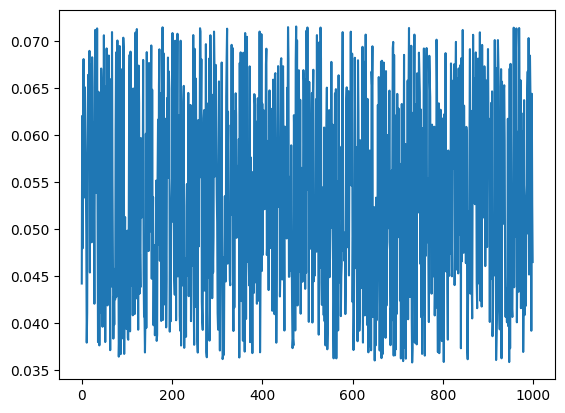

In [6]:
import numpy as np  
atvMax = 0.0716 #2259545,88 ton/ano para ton/s
atvMin = 0.0358 #1129772,94 ton/ano para ton/s
n = 1000
atv = (atvMax-atvMin)*np.random.rand(n) + atvMin

# Criando uma figura com os valores aleatórios
fig, ax= plt.subplots()
ax.plot(atv)

In [7]:
import pandas as pd

# Criar um intervalo de datas com frequência horária
datas = pd.date_range(start='2023-01-01', end='2023-12-31', freq='h')

# Criar um DataFrame com as datas
df = pd.DataFrame({'Data': datas})

# Extrair os meses e dias das datas e adicioná-los como novas colunas no DataFrame
df['Mes'] = df['Data'].dt.month
df['Dia'] = df['Data'].dt.dayofyear  # criar um array de 1 a 365 e colocar igual a df['Dia']


# Mostrar o DataFrame resultante
df

,Data,Mes,Dia
0,2023-01-01 00:00:00,1,1
1,2023-01-01 01:00:00,1,1
2,2023-01-01 02:00:00,1,1
3,2023-01-01 03:00:00,1,1
4,2023-01-01 04:00:00,1,1
...,...,...,...
8732,2023-12-30 20:00:00,12,364
8733,2023-12-30 21:00:00,12,364
8734,2023-12-30 22:00:00,12,364
8735,2023-12-30 23:00:00,12,364


In [8]:
# Ajustar meus números aleatórios com base no comprimento do vetor de datas
atvMax = 0.0716*3600 # ton/s para ton/hora
atvMin = 0.0358*3600  # ton/s para ton/hora

# Criando dataframe com datas e valores de atividade aleatória
import pandas as pd
# Extraindo o número de linhas/número de datas
n = df.shape[0]

# Criando atividade aleatória
atv = (atvMax - atvMin)*np.random.rand(n) + atvMin
df['atividade'] = atv
df

,Data,Mes,Dia,atividade
0,2023-01-01 00:00:00,1,1,188.553675
1,2023-01-01 01:00:00,1,1,243.266798
2,2023-01-01 02:00:00,1,1,220.679441
3,2023-01-01 03:00:00,1,1,202.904327
4,2023-01-01 04:00:00,1,1,142.840284
...,...,...,...,...
8732,2023-12-30 20:00:00,12,364,214.751998
8733,2023-12-30 21:00:00,12,364,148.260758
8734,2023-12-30 22:00:00,12,364,152.626138
8735,2023-12-30 23:00:00,12,364,198.510852


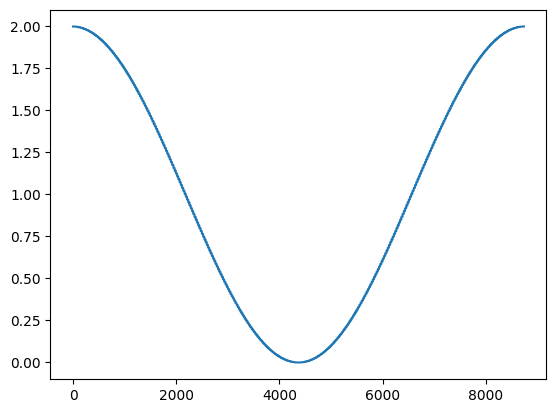

In [9]:
import numpy as np
# Criando componente sazonal
sazonalidade = np.cos((2*np.pi)*df['Dia']/365)+1

df['sazonalidade'] = sazonalidade 

df.to_csv(r"C:\Users\bruna\OneDrive\Documentos\UFSC\Controle de Poluicao Atmosferica\ENS5173_20241\tabelas\ativ.csv" , encoding='ISO-8859-1')
plt.plot(sazonalidade)

(8737,)


<Axes: >

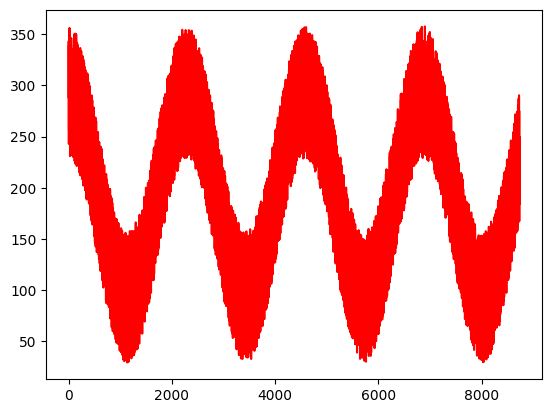

In [10]:
tt = np.arange(0,df.shape[0],1)
print(tt.shape)
df['sazonalidade'] = (np.cos(tt/(365/1)))
df['timeSeries'] = 100*df['sazonalidade']+df['atividade']
df['timeSeries'].plot(color='red')

In [11]:
df

,Data,Mes,Dia,atividade,sazonalidade,timeSeries
0,2023-01-01 00:00:00,1,1,188.553675,1.000000,288.553675
1,2023-01-01 01:00:00,1,1,243.266798,0.999996,343.266423
2,2023-01-01 02:00:00,1,1,220.679441,0.999985,320.677940
3,2023-01-01 03:00:00,1,1,202.904327,0.999966,302.900949
4,2023-01-01 04:00:00,1,1,142.840284,0.999940,242.834279
...,...,...,...,...,...,...
8732,2023-12-30 20:00:00,12,364,214.751998,0.353531,250.105059
8733,2023-12-30 21:00:00,12,364,148.260758,0.356092,183.869966
8734,2023-12-30 22:00:00,12,364,152.626138,0.358651,188.491226
8735,2023-12-30 23:00:00,12,364,198.510852,0.361207,234.631551


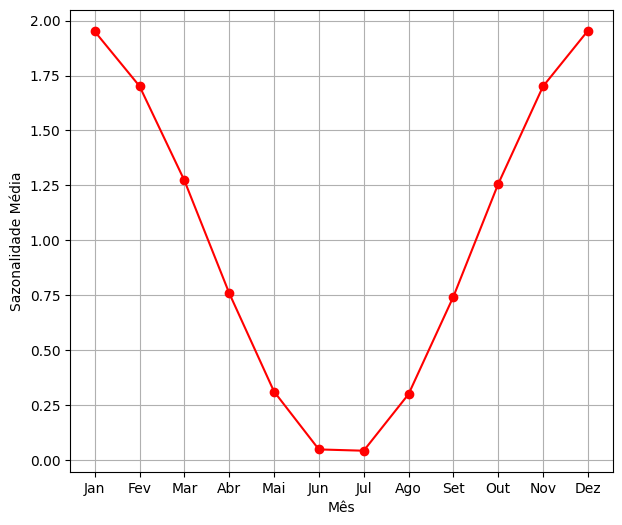

In [12]:
caminho = r"C:\Users\bruna\OneDrive\Documentos\UFSC\Controle de Poluicao Atmosferica\ENS5173_20241\tabelas\ativ.csv"
df = pd.read_csv(caminho)

media_sazonalidade = df.groupby('Mes')['sazonalidade'].mean()

# Plotar a sazonalidade média ao longo dos meses
plt.figure(figsize=(7, 6))
plt.plot(media_sazonalidade, marker='o', linestyle='-', color='red')
plt.xlabel('Mês')
plt.ylabel('Sazonalidade Média')
plt.xticks(range(1, 13), ['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez'])
plt.grid(True)
plt.show()

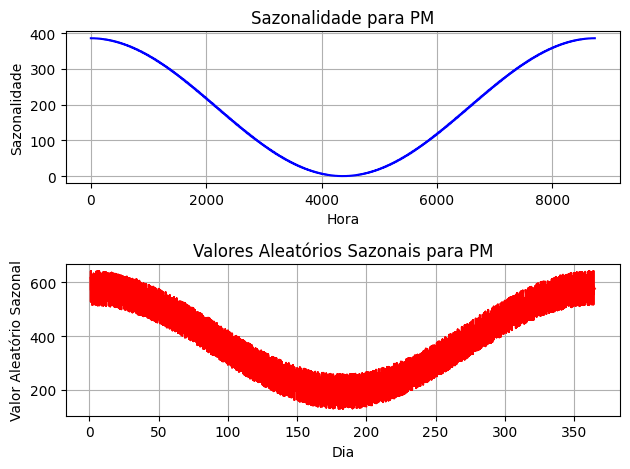

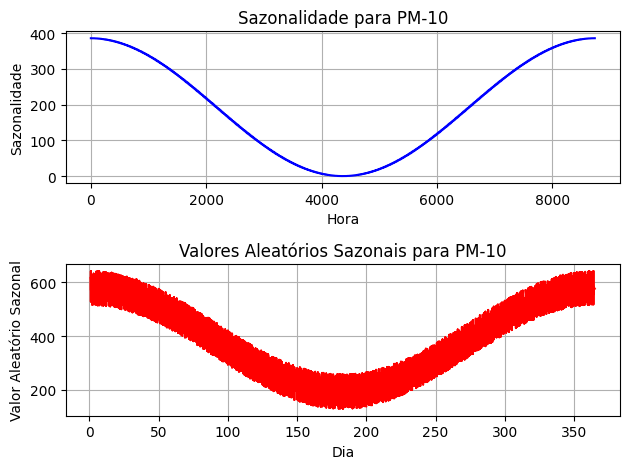

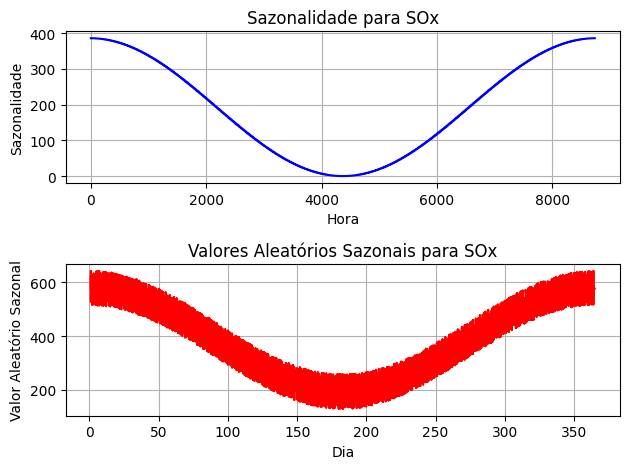

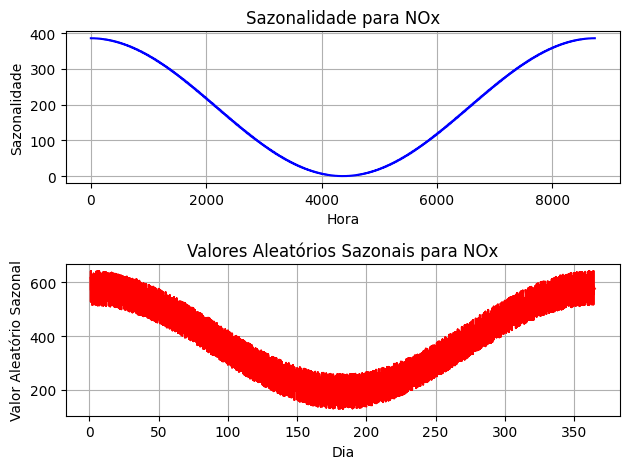

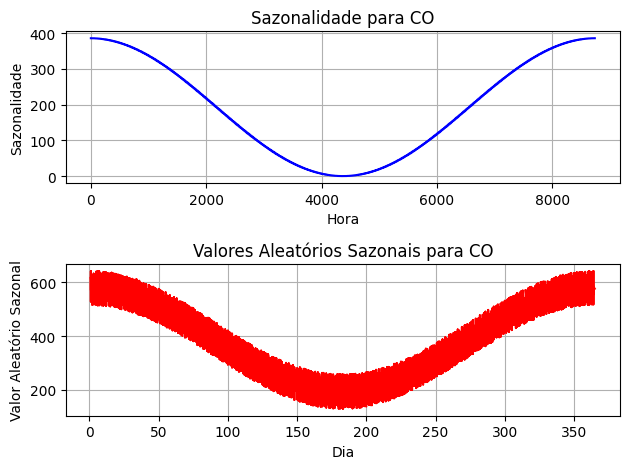

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Lista de poluentes
poluentes = ['PM', 'PM-10', 'SOx', 'NOx', 'CO']

# Para cada poluente, vamos criar os gráficos
for poluente in poluentes:
    # Criando os valores aleatórios e aleatórios sazonais
    df['aleatorio'] = (atvMax - atvMin) * np.random.rand(n) + atvMin
    aleatorioSazonal = (df['atividade'] + df['sazonalidade'] * df['atividade'].mean())
    df['aleatorioSazonal'] = aleatorioSazonal
    
    # Criando os subplots
    fig, ax = plt.subplots(2)
    
    # Plotando o gráfico dos valores aleatórios com sazonalidade
    ax[1].plot(df['Dia'], df['aleatorioSazonal'], color='red')
    ax[1].set_title('Valores Aleatórios Sazonais para {}'.format(poluente))
    ax[1].set_xlabel('Dia')
    ax[1].set_ylabel('Valor Aleatório Sazonal')
    ax[1].grid(True)
    
    # Plotando o gráfico da sazonalidade
    ax[0].plot(df['sazonalidade'] * df['atividade'].mean(), color='blue')
    ax[0].set_title('Sazonalidade para {}'.format(poluente))
    ax[0].set_xlabel('Hora')
    ax[0].set_ylabel('Sazonalidade')
    ax[0].grid(True)
    
    plt.tight_layout()
    plt.show()

In [14]:
# 2259545,88 ton/ano
atv = 257  #Considerando taxa de atividade em toneladas/horas da unidade de Diamante
emis = fe

# Multiplicando todas as colunas, exceto a primeira, pelo valor de atv
for coluna in fe.columns[1:]:  # começa da segunda coluna em diante
    emis[coluna] = fe[coluna] * atv

emis

,Tipo de fonte,PM,PM-10,SOx,NOx,CO
0,"PC, dry bottom, cell burnerh fired, bituminous",63622.9200,19882.1625,30204.98127,24653.88150,397.64325
1,Cyclone Furnance,15905.7300,2544.9168,30204.98127,26244.45450,397.64325
2,Spreader Stoker,52488.9090,10497.7818,30204.98127,8748.15150,3976.43250
3,Overfeed stokeri,12724.5840,4771.7190,30204.98127,5964.64875,4771.71900
4,Underfeed stoker,11929.2975,4930.7763,24653.88150,7571.12748,8748.15150
5,Hand-fed units,11929.2975,4930.7763,24653.88150,7221.20142,219180.95940


In [15]:
# Lista de poluentes
poluentes = ['PM', 'PM-10', 'SOx','NOx','CO']

resultados_PC_drybottom_cellburnerhfired_bituminous = pd.DataFrame(index=df.index)

for poluente in poluentes:
    resultados_PC_drybottom_cellburnerhfired_bituminous[poluente] = df['atividade'] * emis.loc[0, poluente]

print("Tabela para o tipo de fonte: PC,drybottom,cellburnerhfired,bituminous")
resultados_PC_drybottom_cellburnerhfired_bituminous

Tabela para o tipo de fonte: PC,drybottom,cellburnerhfired,bituminous


,PM,PM-10,SOx,NOx,CO
0,1.199634e+07,3.748855e+06,5.695260e+06,4.648580e+06,74977.096220
1,1.547734e+07,4.836670e+06,7.347869e+06,5.997471e+06,96733.400145
2,1.404027e+07,4.387585e+06,6.665618e+06,5.440605e+06,87751.690194
3,1.290937e+07,4.034177e+06,6.128721e+06,5.002379e+06,80683.536059
4,9.087916e+06,2.839974e+06,4.314488e+06,3.521567e+06,56799.474688
...,...,...,...,...,...
8732,1.366315e+07,4.269734e+06,6.486580e+06,5.294470e+06,85394.682299
8733,9.432782e+06,2.947744e+06,4.478213e+06,3.655203e+06,58954.889720
8734,9.710521e+06,3.034538e+06,4.610070e+06,3.762827e+06,60690.753669
8735,1.262984e+07,3.946825e+06,5.996017e+06,4.894063e+06,78936.500210


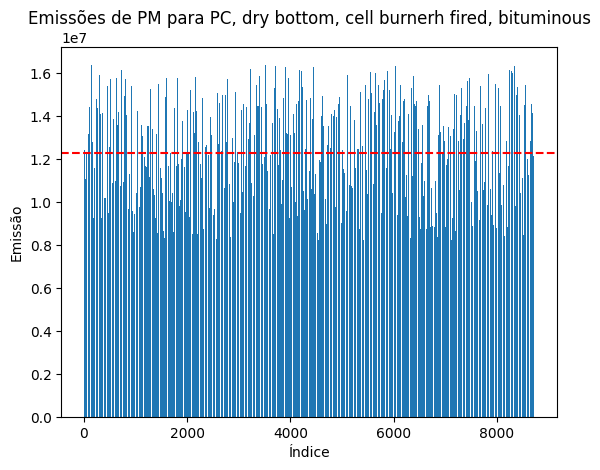

<Figure size 700x600 with 0 Axes>

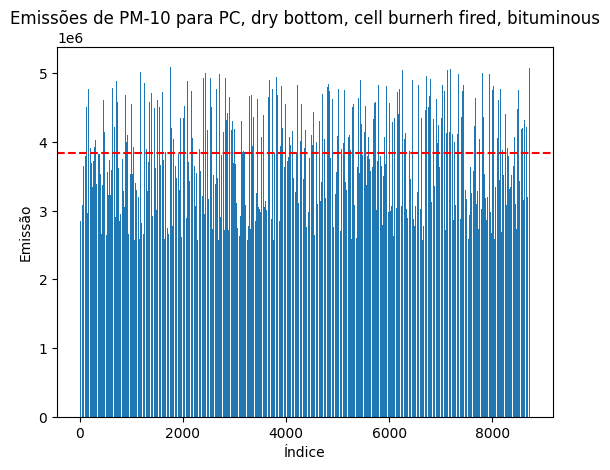

<Figure size 700x600 with 0 Axes>

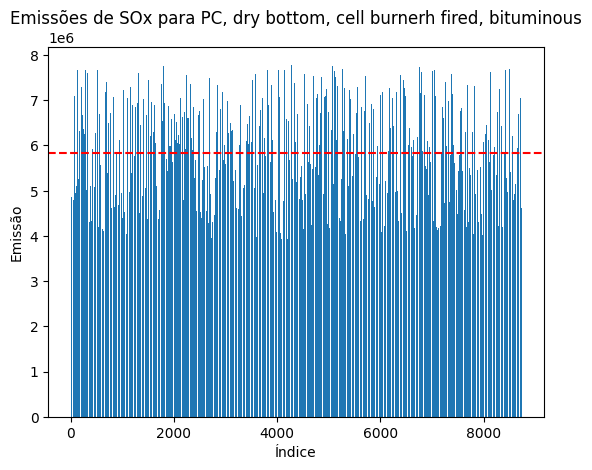

<Figure size 700x600 with 0 Axes>

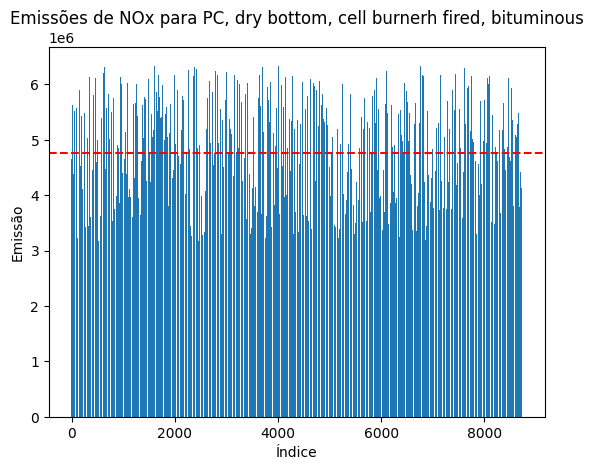

<Figure size 700x600 with 0 Axes>

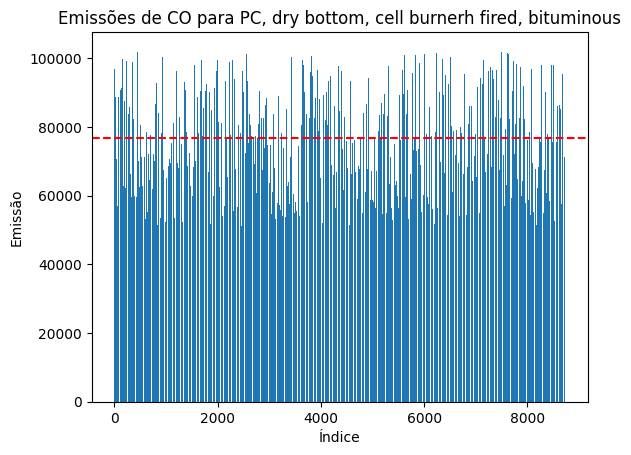

<Figure size 700x600 with 0 Axes>

In [16]:
import matplotlib.pyplot as plt

# Definir os poluentes como as colunas do DataFrame
poluentes =  resultados_PC_drybottom_cellburnerhfired_bituminous.columns
for poluente in poluentes:
    fig, ax = plt.subplots()  
    ax.bar( resultados_PC_drybottom_cellburnerhfired_bituminous[poluente].index,  resultados_PC_drybottom_cellburnerhfired_bituminous[poluente])
    media_poluente = resultados_PC_drybottom_cellburnerhfired_bituminous[poluente].mean()
    
    # linha horizontal para representar a média
    ax.axhline(y=media_poluente, color='r', linestyle='--', label=f'Média: {media_poluente:.2f}')
    
    # Adicionar rótulos aos eixos
    ax.set_xlabel('Índice')
    ax.set_ylabel('Emissão')
    ax.set_title(f'Emissões de {poluente} para PC, dry bottom, cell burnerh fired, bituminous')
    
    # Mostrar o gráfico  
    plt.figure(figsize=(7, 6))
    plt.show()

In [17]:
resultados_Cyclone_Furnance = pd.DataFrame(index=df.index)
for poluente in poluentes:
    resultados_Cyclone_Furnance[poluente] = df['atividade'] * emis.loc[1, poluente]

print("Tabela para o tipo de fonte: Cyclone Furnance")
resultados_Cyclone_Furnance

Tabela para o tipo de fonte: Cyclone Furnance


,PM,PM-10,SOx,NOx,CO
0,2.999084e+06,479853.415808,5.695260e+06,4.948488e+06,74977.096220
1,3.869336e+06,619093.760928,7.347869e+06,6.384404e+06,96733.400145
2,3.510068e+06,561610.817244,6.665618e+06,5.791612e+06,87751.690194
3,3.227341e+06,516374.630781,6.128721e+06,5.325113e+06,80683.536059
4,2.271979e+06,363516.638001,4.314488e+06,3.748765e+06,56799.474688
...,...,...,...,...,...
8732,3.415787e+06,546525.966715,6.486580e+06,5.636049e+06,85394.682299
8733,2.358196e+06,377311.294210,4.478213e+06,3.891023e+06,58954.889720
8734,2.427630e+06,388420.823479,4.610070e+06,4.005590e+06,60690.753669
8735,3.157460e+06,505193.601344,5.996017e+06,5.209809e+06,78936.500210


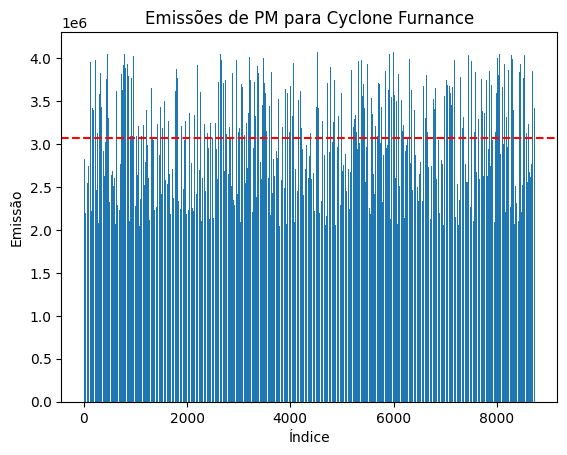

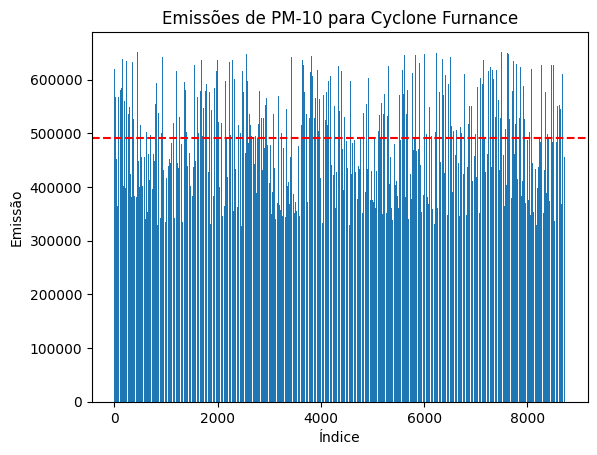

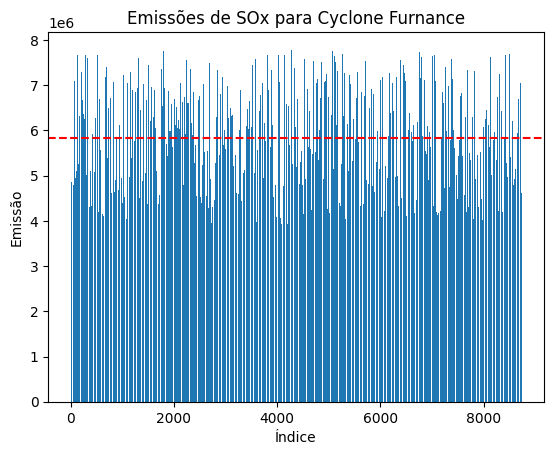

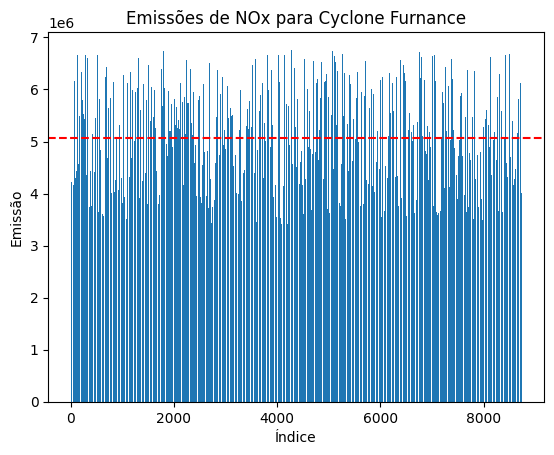

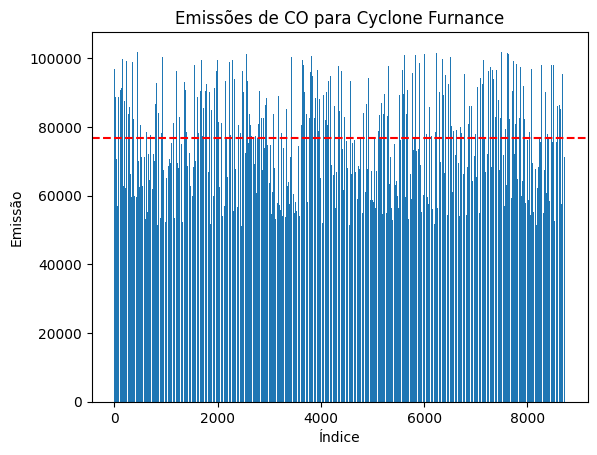

In [18]:
import matplotlib.pyplot as plt

# Definir os poluentes como as colunas do DataFrame
poluentes = resultados_Cyclone_Furnance.columns
for poluente in poluentes:
    fig, ax = plt.subplots()
    ax.bar(resultados_Cyclone_Furnance.index, resultados_Cyclone_Furnance[poluente])
    media_poluente = resultados_Cyclone_Furnance[poluente].mean()
    
    # T linha horizontal para representar a média
    ax.axhline(y=media_poluente, color='r', linestyle='--', label=f'Média: {media_poluente:.2f}')
    
    # Adicionar rótulos aos eixos
    ax.set_xlabel('Índice')
    ax.set_ylabel('Emissão')
    ax.set_title(f'Emissões de {poluente} para Cyclone Furnance')
    
    # Mostrar o gráfico
    plt.show()

In [19]:
resultados_Spreader_Stoker = pd.DataFrame(index=df.index)
for poluente in poluentes:
    resultados_Spreader_Stoker[poluente] = df['atividade'] * emis.loc[2, poluente]

print("Tabela para o tipo de fonte: Spreader Stoker")
resultados_Spreader_Stoker

Tabela para o tipo de fonte: Spreader Stoker


,PM,PM-10,SOx,NOx,CO
0,9.896977e+06,1.979395e+06,5.695260e+06,1.649496e+06,749770.962201
1,1.276881e+07,2.553762e+06,7.347869e+06,2.128135e+06,967334.001449
2,1.158322e+07,2.316645e+06,6.665618e+06,1.930537e+06,877516.901944
3,1.065023e+07,2.130045e+06,6.128721e+06,1.775038e+06,806835.360595
4,7.497531e+06,1.499506e+06,4.314488e+06,1.249588e+06,567994.746877
...,...,...,...,...,...
8732,1.127210e+07,2.254420e+06,6.486580e+06,1.878683e+06,853946.822992
8733,7.782045e+06,1.556409e+06,4.478213e+06,1.297008e+06,589548.897203
8734,8.011179e+06,1.602236e+06,4.610070e+06,1.335197e+06,606907.536686
8735,1.041962e+07,2.083924e+06,5.996017e+06,1.736603e+06,789365.002100


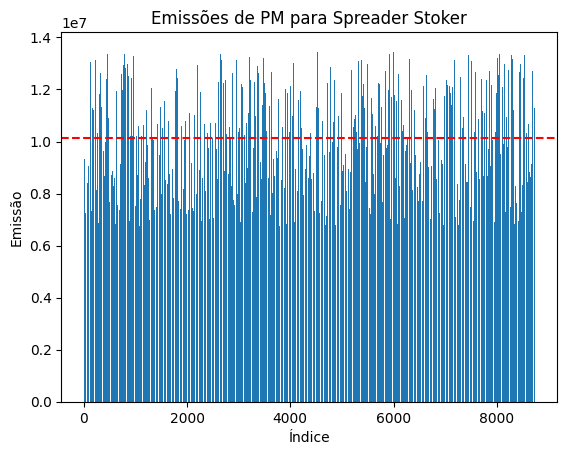

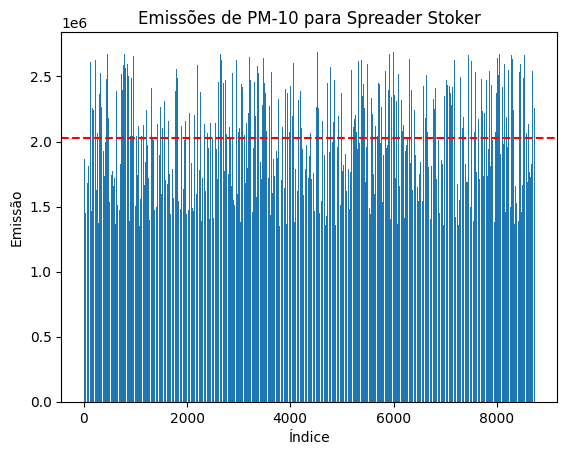

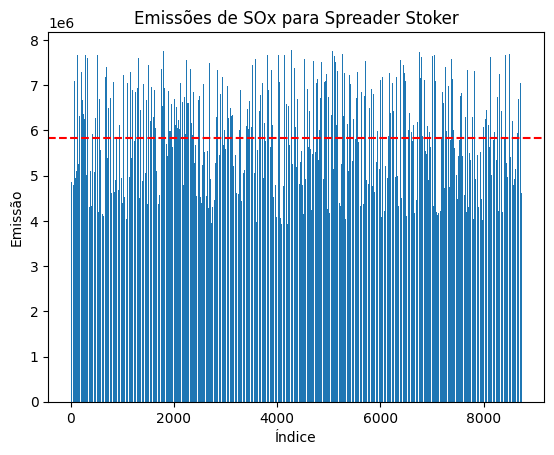

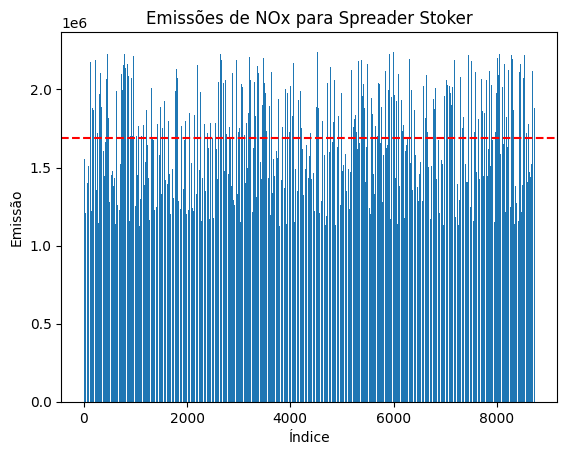

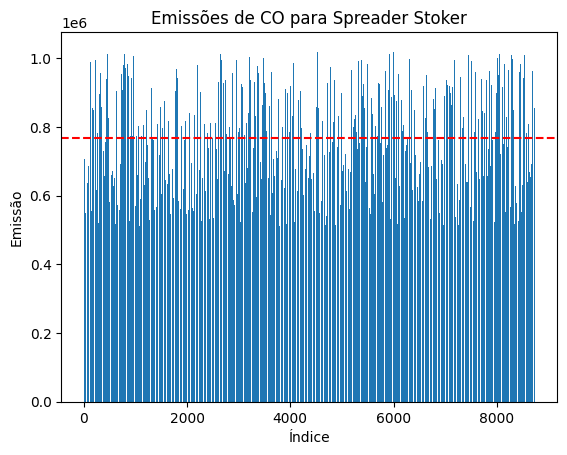

In [20]:
import matplotlib.pyplot as plt
poluentes = resultados_Spreader_Stoker.columns
for poluente in poluentes: 
    fig, ax = plt.subplots()
    
    # Plotar os dados para o poluente atual em um gráfico de barras
    ax.bar(resultados_Spreader_Stoker.index, resultados_Spreader_Stoker[poluente])

    media_poluente = resultados_Spreader_Stoker[poluente].mean()
    
    # linha horizontal para representar a média
    ax.axhline(y=media_poluente, color='r', linestyle='--', label=f'Média: {media_poluente:.2f}')
    
   
    ax.set_xlabel('Índice')
    ax.set_ylabel('Emissão')
    ax.set_title(f'Emissões de {poluente} para Spreader Stoker')
    
    # Mostrar o gráfico
    plt.show()

In [21]:
resultados_Overfeed_stokeri = pd.DataFrame(index=df.index)
for poluente in poluentes:
    resultados_Overfeed_stokeri[poluente] = df['atividade'] * emis.loc[3, poluente]

print("Tabela para o tipo de fonte: Overfeed stokeri")
resultados_Overfeed_stokeri

Tabela para o tipo de fonte: Overfeed stokeri


,PM,PM-10,SOx,NOx,CO
0,2.399267e+06,8.997252e+05,5.695260e+06,1.124656e+06,8.997252e+05
1,3.095469e+06,1.160801e+06,7.347869e+06,1.451001e+06,1.160801e+06
2,2.808054e+06,1.053020e+06,6.665618e+06,1.316275e+06,1.053020e+06
3,2.581873e+06,9.682024e+05,6.128721e+06,1.210253e+06,9.682024e+05
4,1.817583e+06,6.815937e+05,4.314488e+06,8.519921e+05,6.815937e+05
...,...,...,...,...,...
8732,2.732630e+06,1.024736e+06,6.486580e+06,1.280920e+06,1.024736e+06
8733,1.886556e+06,7.074587e+05,4.478213e+06,8.843233e+05,7.074587e+05
8734,1.942104e+06,7.282890e+05,4.610070e+06,9.103613e+05,7.282890e+05
8735,2.525968e+06,9.472380e+05,5.996017e+06,1.184048e+06,9.472380e+05


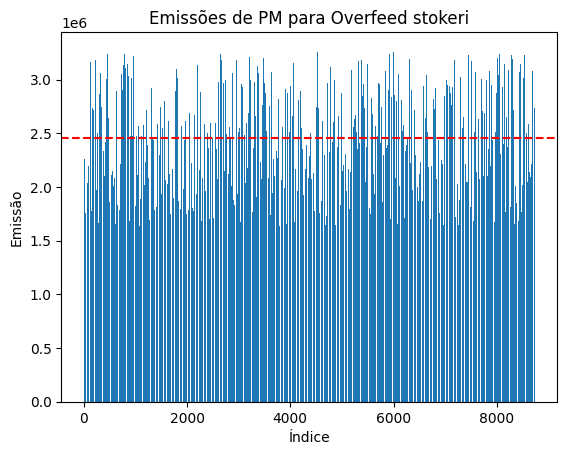

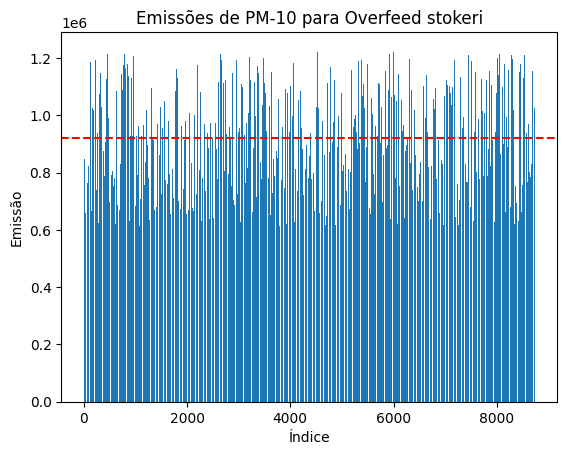

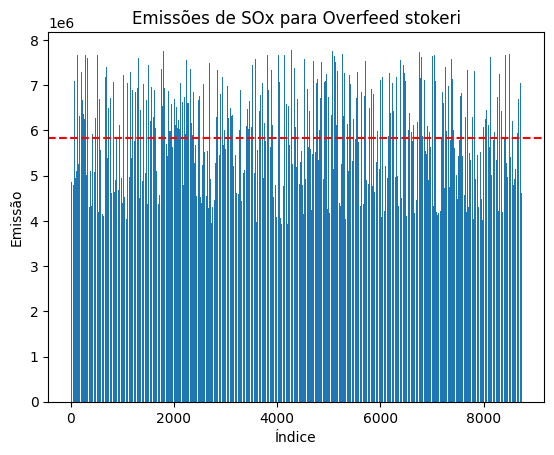

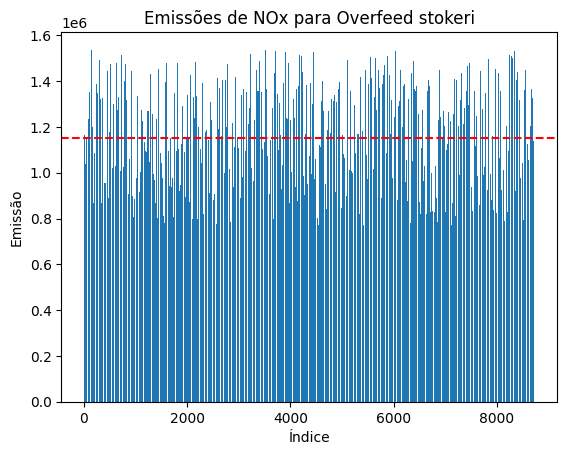

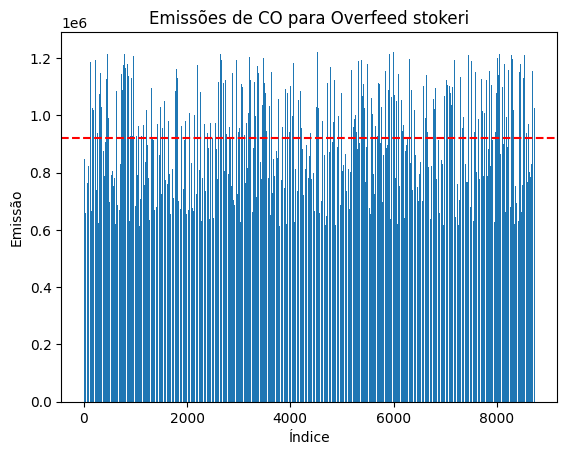

In [22]:
import matplotlib.pyplot as plt

poluentes = resultados_Overfeed_stokeri.columns
for poluente in poluentes:
    fig, ax = plt.subplots()    
    ax.bar(resultados_Overfeed_stokeri.index, resultados_Overfeed_stokeri[poluente])
    media_poluente = resultados_Overfeed_stokeri[poluente].mean()
    
    #  linha horizontal para representar a média
    ax.axhline(y=media_poluente, color='r', linestyle='--', label=f'Média: {media_poluente:.2f}')
    
    # Adicione rótulos aos eixos
    ax.set_xlabel('Índice')
    ax.set_ylabel('Emissão')
    ax.set_title(f'Emissões de {poluente} para Overfeed stokeri')
    
    # Mostrar o gráfico
    plt.show()

In [23]:
resultados_Underfeed_stoker = pd.DataFrame(index=df.index)
for poluente in poluentes:
    resultados_Underfeed_stoker[poluente] = df['atividade'] * emis.loc[3, poluente]

print("Tabela para o tipo de fonte: Underfeed stoker")
resultados_Underfeed_stoker

Tabela para o tipo de fonte: Underfeed stoker


,PM,PM-10,SOx,NOx,CO
0,2.399267e+06,8.997252e+05,5.695260e+06,1.124656e+06,8.997252e+05
1,3.095469e+06,1.160801e+06,7.347869e+06,1.451001e+06,1.160801e+06
2,2.808054e+06,1.053020e+06,6.665618e+06,1.316275e+06,1.053020e+06
3,2.581873e+06,9.682024e+05,6.128721e+06,1.210253e+06,9.682024e+05
4,1.817583e+06,6.815937e+05,4.314488e+06,8.519921e+05,6.815937e+05
...,...,...,...,...,...
8732,2.732630e+06,1.024736e+06,6.486580e+06,1.280920e+06,1.024736e+06
8733,1.886556e+06,7.074587e+05,4.478213e+06,8.843233e+05,7.074587e+05
8734,1.942104e+06,7.282890e+05,4.610070e+06,9.103613e+05,7.282890e+05
8735,2.525968e+06,9.472380e+05,5.996017e+06,1.184048e+06,9.472380e+05


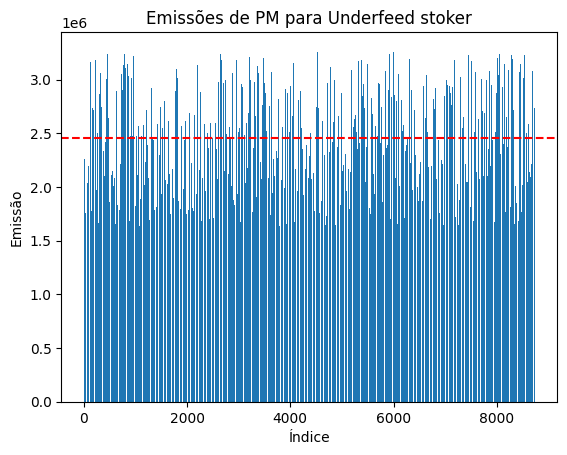

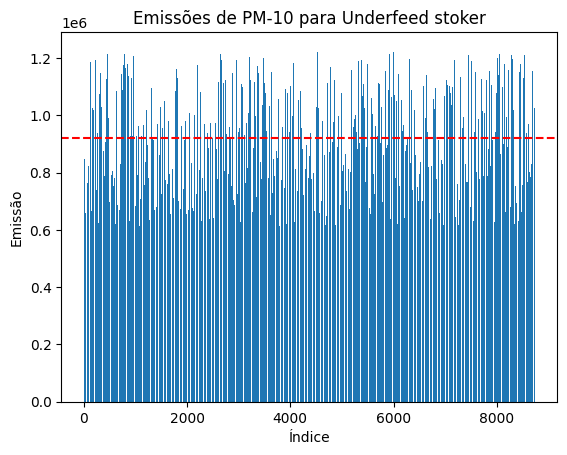

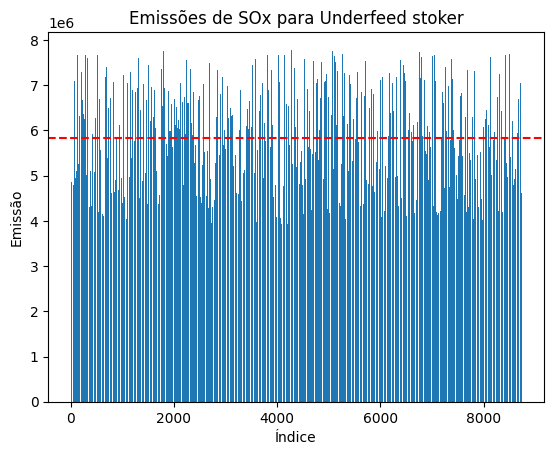

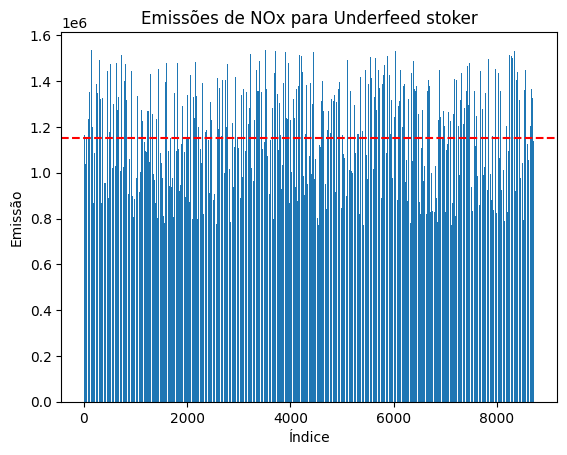

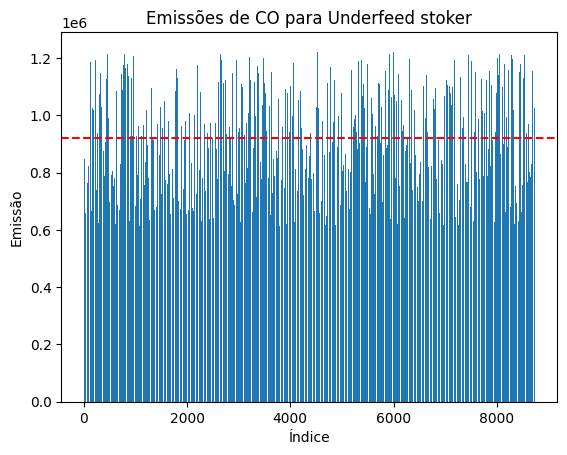

In [24]:
import matplotlib.pyplot as plt

poluentes = resultados_Underfeed_stoker.columns
for poluente in poluentes:
    fig, ax = plt.subplots()    
    ax.bar(resultados_Underfeed_stoker.index, resultados_Underfeed_stoker[poluente])
    media_poluente = resultados_Overfeed_stokeri[poluente].mean()
    
    #  linha horizontal para representar a média
    ax.axhline(y=media_poluente, color='r', linestyle='--', label=f'Média: {media_poluente:.2f}')
    
    # Adicione rótulos aos eixos
    ax.set_xlabel('Índice')
    ax.set_ylabel('Emissão')
    ax.set_title(f'Emissões de {poluente} para Underfeed stoker')
    
    # Mostrar o gráfico
    plt.show()

In [25]:
resultados_Handfed_units = pd.DataFrame(index=df.index)
for poluente in poluentes:
    resultados_Handfed_units[poluente] = df['atividade'] * emis.loc[3, poluente]

print("Tabela para o tipo de fonte: Handfed units")
resultados_Handfed_units

Tabela para o tipo de fonte: Handfed units


,PM,PM-10,SOx,NOx,CO
0,2.399267e+06,8.997252e+05,5.695260e+06,1.124656e+06,8.997252e+05
1,3.095469e+06,1.160801e+06,7.347869e+06,1.451001e+06,1.160801e+06
2,2.808054e+06,1.053020e+06,6.665618e+06,1.316275e+06,1.053020e+06
3,2.581873e+06,9.682024e+05,6.128721e+06,1.210253e+06,9.682024e+05
4,1.817583e+06,6.815937e+05,4.314488e+06,8.519921e+05,6.815937e+05
...,...,...,...,...,...
8732,2.732630e+06,1.024736e+06,6.486580e+06,1.280920e+06,1.024736e+06
8733,1.886556e+06,7.074587e+05,4.478213e+06,8.843233e+05,7.074587e+05
8734,1.942104e+06,7.282890e+05,4.610070e+06,9.103613e+05,7.282890e+05
8735,2.525968e+06,9.472380e+05,5.996017e+06,1.184048e+06,9.472380e+05


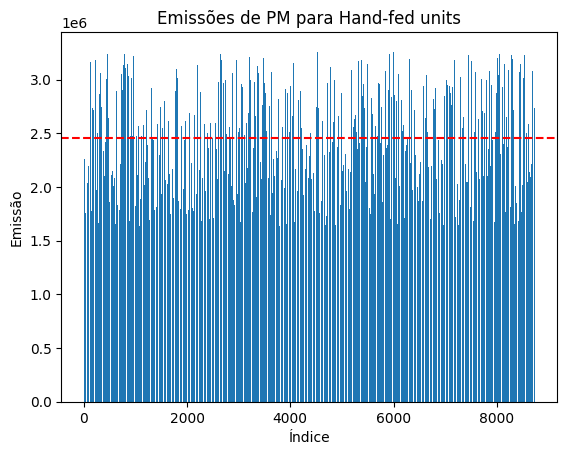

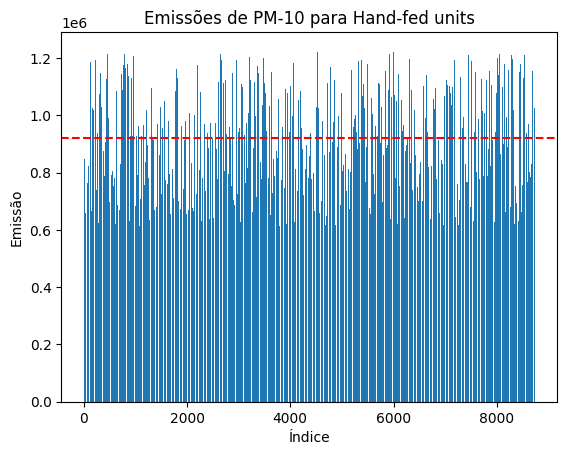

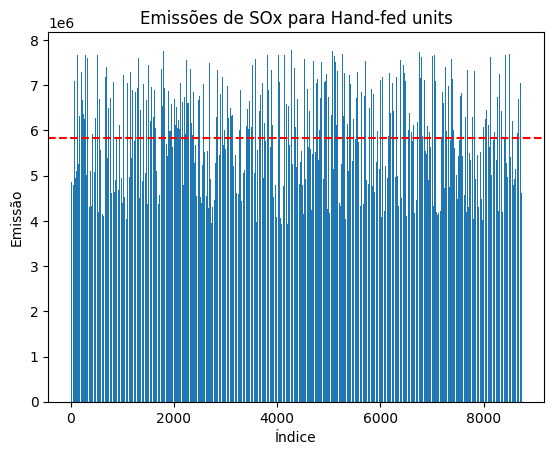

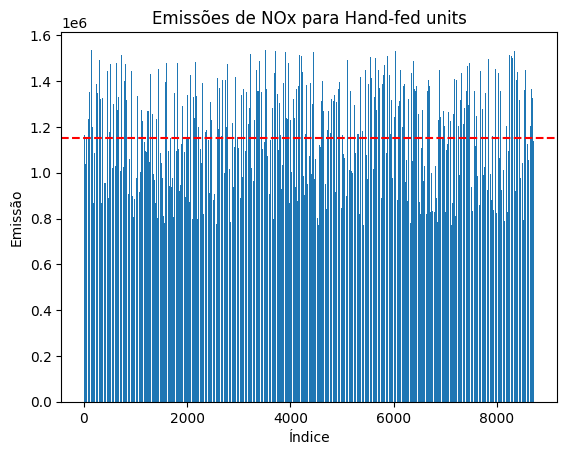

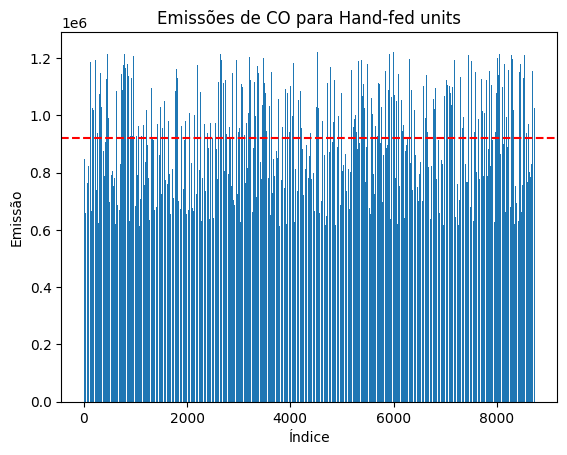

In [26]:
import matplotlib.pyplot as plt

poluentes = resultados_Handfed_units.columns
for poluente in poluentes:
    fig, ax = plt.subplots()    
    ax.bar(resultados_Handfed_units.index, resultados_Handfed_units[poluente])
    media_poluente = resultados_Handfed_units[poluente].mean()
    
    #  linha horizontal para representar a média
    ax.axhline(y=media_poluente, color='r', linestyle='--', label=f'Média: {media_poluente:.2f}')
    
    # Adicione rótulos aos eixos
    ax.set_xlabel('Índice')
    ax.set_ylabel('Emissão')
    ax.set_title(f'Emissões de {poluente} para Hand-fed units')
    
    # Mostrar o gráfico
    plt.show()

In [27]:
# Somar os poluentes em cada processo
soma_por_processo = {
    'PC, drybottom, cell burnerh fired, bituminous': resultados_PC_drybottom_cellburnerhfired_bituminous.sum(),
    'Cyclone Furnance':  resultados_Cyclone_Furnance.sum(),
    'Spreader Stoker': resultados_Spreader_Stoker.sum(),
    'Overfeed stokeri': resultados_Overfeed_stokeri.sum(),
    'Underfeed stoker': resultados_Underfeed_stoker.sum(),
    'Hand-fed units': resultados_Handfed_units.sum()
}

print("Soma dos poluentes em cada processo:")
for processo, soma in soma_por_processo.items():
    print(f"{processo}:")
    print(soma)
    print()

# Somar todos os poluentes de todos os processos
soma_total = resultados_PC_drybottom_cellburnerhfired_bituminous.sum() + resultados_Cyclone_Furnance.sum() + resultados_Spreader_Stoker.sum() + resultados_Overfeed_stokeri.sum() + resultados_Underfeed_stoker.sum() + resultados_Handfed_units.sum()

# Mostrar a soma total dos poluentes
print('Soma total dos poluentes de todos os processos:')
print('soma_total')

Soma dos poluentes em cada processo:
PC, drybottom, cell burnerh fired, bituminous:
PM       1.071735e+11
PM-10    3.349172e+10
SOx      5.088062e+10
NOx      4.152973e+10
CO       6.698344e+08
dtype: float64

Cyclone Furnance:
PM       2.679338e+10
PM-10    4.286940e+09
SOx      5.088062e+10
NOx      4.420907e+10
CO       6.698344e+08
dtype: float64

Spreader Stoker:
PM       8.841814e+10
PM-10    1.768363e+10
SOx      5.088062e+10
NOx      1.473636e+10
CO       6.698344e+09
dtype: float64

Overfeed stokeri:
PM       2.143470e+10
PM-10    8.038013e+09
SOx      5.088062e+10
NOx      1.004752e+10
CO       8.038013e+09
dtype: float64

Underfeed stoker:
PM       2.143470e+10
PM-10    8.038013e+09
SOx      5.088062e+10
NOx      1.004752e+10
CO       8.038013e+09
dtype: float64

Hand-fed units:
PM       2.143470e+10
PM-10    8.038013e+09
SOx      5.088062e+10
NOx      1.004752e+10
CO       8.038013e+09
dtype: float64

Soma total dos poluentes de todos os processos:
soma_total


PM       2.866891e+11
PM-10    7.957633e+10
SOx      3.052837e+11
NOx      1.306177e+11
CO       3.215205e+10
dtype: float64


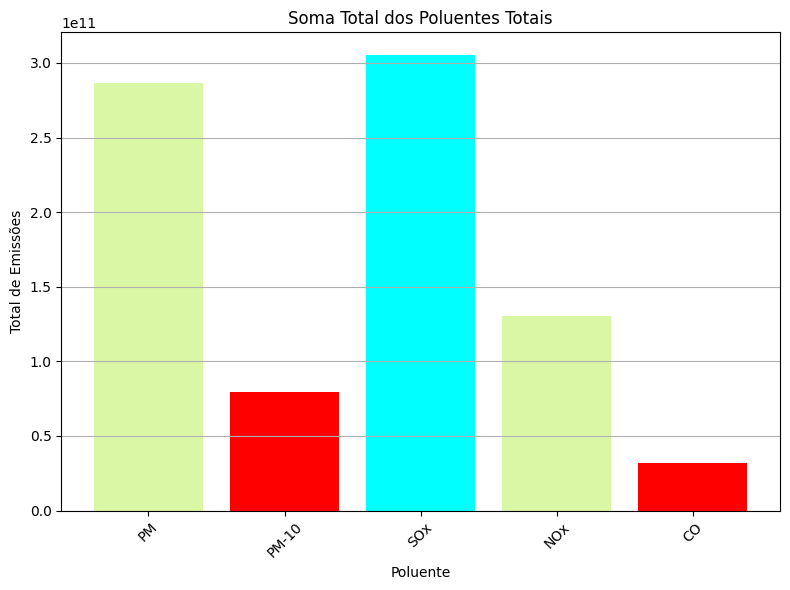

In [32]:
import matplotlib.pyplot as plt

# Calcular a soma total dos poluentes
soma_total = resultados_PC_drybottom_cellburnerhfired_bituminous.sum() + resultados_Cyclone_Furnance.sum() + resultados_Spreader_Stoker.sum() + resultados_Overfeed_stokeri.sum() + resultados_Underfeed_stoker.sum() + resultados_Handfed_units.sum()
print(soma_total)

# gráfico para a soma total dos poluentes
plt.figure(figsize=(8, 6))
plt.bar(soma_total.index, soma_total.values, color=['#DAF7A6','red','cyan'])
plt.title('Soma Total dos Poluentes Totais')
plt.xlabel('Poluente')
plt.ylabel('Total de Emissões')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [29]:
emissao_media = soma_total.mean()
emissao_minima = soma_total.min()
emissao_maxima = soma_total.max()

print("Emissão Média:", emissao_media)
print("Emissão Mínima:", emissao_minima)
print("Emissão Máxima:", emissao_maxima)

Emissão Média: 166863794324.53714
Emissão Mínima: 32152052601.150414
Emissão Máxima: 305283739447.9232


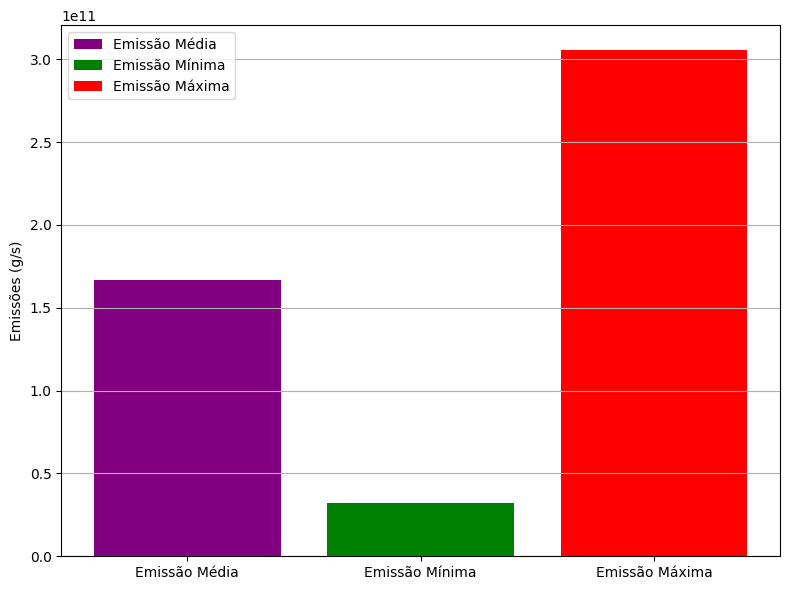

In [30]:
plt.figure(figsize=(8, 6))

# Barras para emissão média 
plt.bar('Emissão Média', emissao_media, color='purple', label='Emissão Média')

# Barras para emissão mínima 
plt.bar('Emissão Mínima', emissao_minima, color='green', label='Emissão Mínima')

# Barras para emissão máxima
plt.bar('Emissão Máxima', emissao_maxima, color='red', label='Emissão Máxima')

plt.ylabel('Emissões (g/s)')
plt.legend()
plt.grid(axis='y')
plt.tight_layout()
plt.show()